[*********************100%***********************]  1 of 1 completed


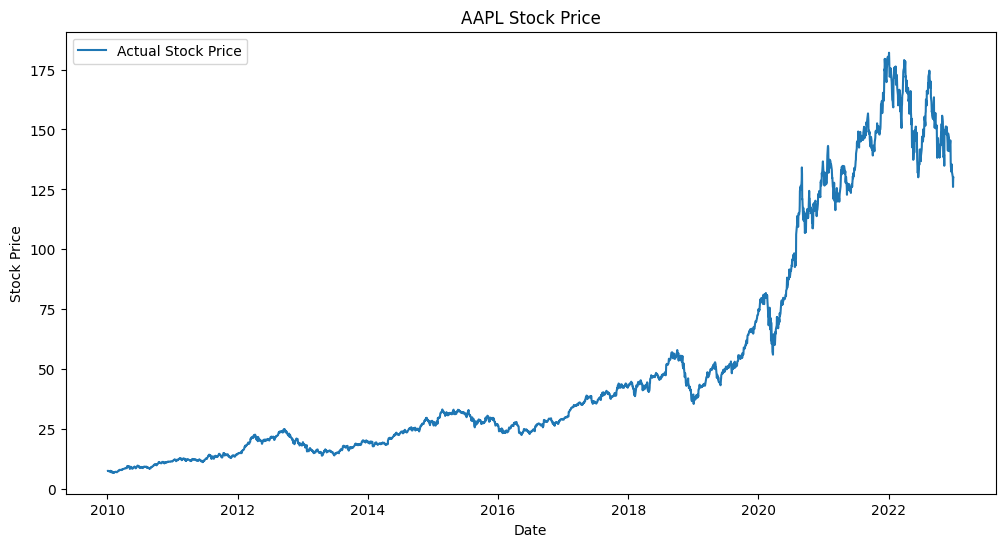

Epoch 1/100
41/41 [==============================] - 20s 70ms/step - loss: 0.0037
Epoch 2/100
41/41 [==============================] - 3s 69ms/step - loss: 1.1387e-04
Epoch 3/100
41/41 [==============================] - 3s 70ms/step - loss: 8.3203e-05
Epoch 4/100
41/41 [==============================] - 4s 91ms/step - loss: 7.9765e-05
Epoch 5/100
41/41 [==============================] - 3s 75ms/step - loss: 7.9626e-05
Epoch 6/100
41/41 [==============================] - 3s 70ms/step - loss: 7.1793e-05
Epoch 7/100
41/41 [==============================] - 3s 68ms/step - loss: 7.1018e-05
Epoch 8/100
41/41 [==============================] - 4s 89ms/step - loss: 6.7370e-05
Epoch 9/100
41/41 [==============================] - 3s 78ms/step - loss: 6.3053e-05
Epoch 10/100
41/41 [==============================] - 3s 68ms/step - loss: 6.2164e-05
Epoch 11/100
41/41 [==============================] - 3s 70ms/step - loss: 6.0724e-05
Epoch 12/100
41/41 [==============================] - 3s 84ms/step

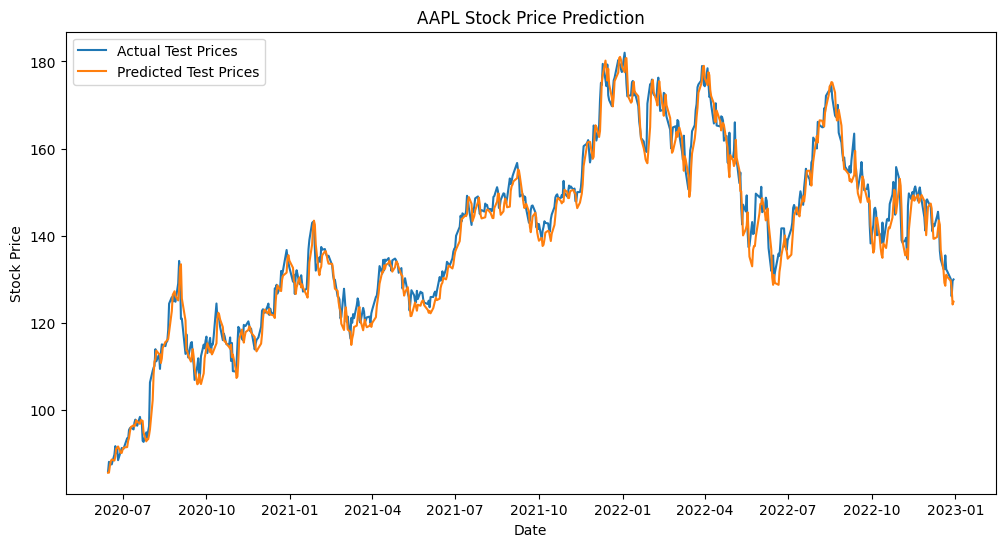

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2023-01-01"

data = yf.download(stock_symbol, start=start_date, end=end_date)

data = data[['Close']]

plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Stock Price")
plt.legend()
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

window_size = 60

X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i : i + window_size])
    y.append(scaled_data[i + window_size])

X, y = np.array(X), np.array(y)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Test Prices")
plt.plot(data.index[-len(y_test):], test_predictions, label="Predicted Test Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.legend()
plt.show()